#📌 Extracción

In [1]:
import requests
import pandas as pd

In [2]:
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json"

response = requests.get(url)
datos = response.json()

df = pd.DataFrame(datos)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [3]:
df = pd.json_normalize(datos)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


#🔧 Transformación

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

2. Verificación de valores unicos

In [6]:
for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

3. Valores Duplicados

In [7]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


4. Valores nulos

In [8]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


5. Valores vacios o en blanco

In [9]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


**Transformación**

1. Cambiando la columna account.Charges.Total para float

In [10]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


2. Eliminación de valores vacios en la columna Churn

In [11]:
df = df[df['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(df))

Número de filas despues de eliminar los vacios en 'Churn': 7043


In [12]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [13]:
df = df.dropna(subset=['account.Charges.Total'])

In [14]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [30]:
df.columns



Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [31]:
df['Cuentas_Diarias'] = (df['account.Charges.Monthly'] / 30).round(2)



In [32]:
df.head()


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


#📊 Carga y análisis

In [33]:
df.describe()


,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159891
std,0.368844,24.545260,30.085974,2266.771362,1.002955
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.587500,401.450000,1.187500
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.862500,3794.737500,2.992500
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [34]:
df[['account.Charges.Monthly', 'account.Charges.Total', 'Cuentas_Diarias']].describe()


,account.Charges.Monthly,account.Charges.Total,Cuentas_Diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159891
std,30.085974,2266.771362,1.002955
min,18.250000,18.800000,0.610000
25%,35.587500,401.450000,1.187500
50%,70.350000,1397.475000,2.340000
75%,89.862500,3794.737500,2.992500
max,118.750000,8684.800000,3.960000


In [35]:
df[['account.Charges.Monthly', 'Cuentas_Diarias']].agg(['mean', 'median', 'std'])


,account.Charges.Monthly,Cuentas_Diarias
mean,64.798208,2.159891
median,70.350000,2.340000
std,30.085974,1.002955


###Distribución de evasión

In [37]:
df['Churn'].value_counts()


,count
Churn,
No,5163
Yes,1869


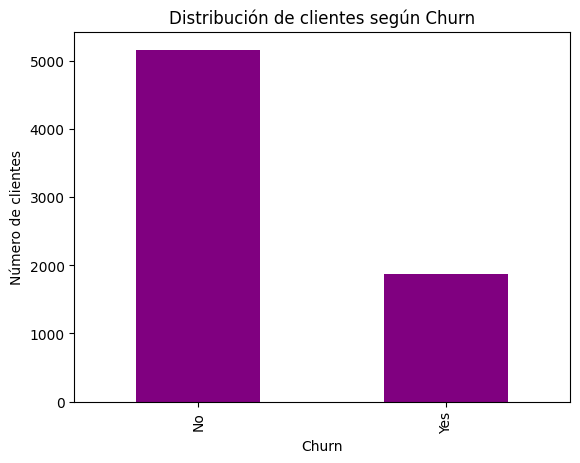

In [45]:
import matplotlib.pyplot as plt

churn_counts = df['Churn'].value_counts()

plt.figure()
churn_counts.plot(kind='bar', color='purple')
plt.title('Distribución de clientes según Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()


In [72]:
import matplotlib.pyplot as plt

def churn_por_categoria(df, columna):
    tabla = pd.crosstab(df[columna], df['Churn'], normalize='index') * 100

    tabla.plot(kind='bar', stacked=True, color=['skyblue', 'gray'])
    plt.xticks(rotation=0)
    plt.title(f'Distribución de Churn por género')
    plt.xlabel(columna)
    plt.ylabel('Porcentaje')
    plt.legend(title='Churn')
    plt.show()

    return tabla


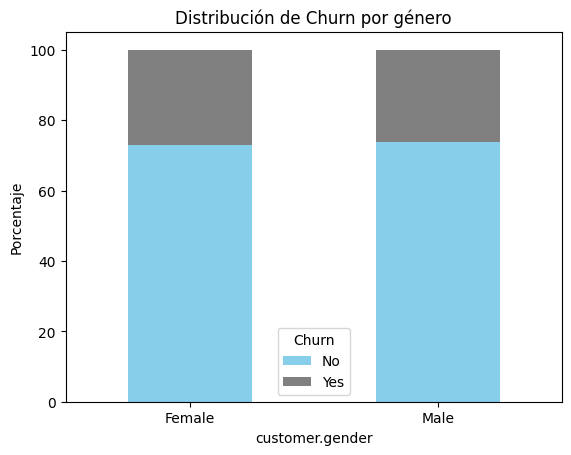

Churn,No,Yes
customer.gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


In [73]:
churn_por_categoria(df, 'customer.gender')


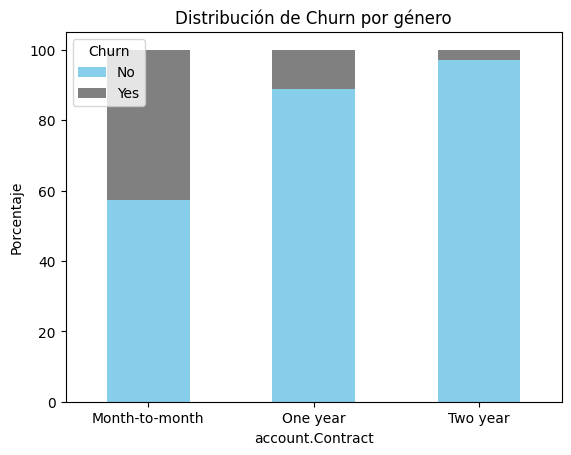

Churn,No,Yes
account.Contract,,
Month-to-month,57.290323,42.709677
One year,88.722826,11.277174
Two year,97.151335,2.848665


In [74]:
churn_por_categoria(df, 'account.Contract')


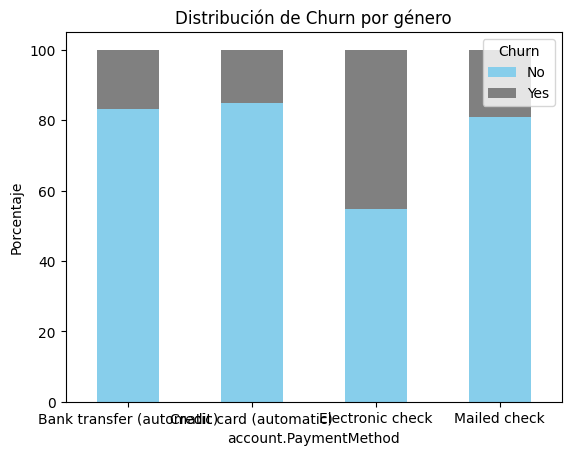

Churn,No,Yes
account.PaymentMethod,,
Bank transfer (automatic),83.268482,16.731518
Credit card (automatic),84.746877,15.253123
Electronic check,54.714588,45.285412
Mailed check,80.798005,19.201995


In [75]:
churn_por_categoria(df, 'account.PaymentMethod')


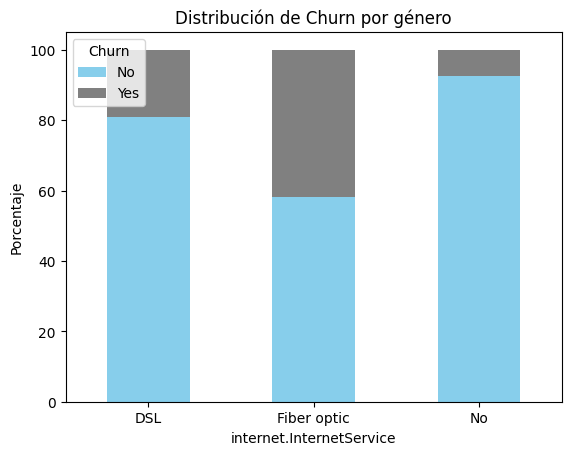

Churn,No,Yes
internet.InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


In [85]:
churn_por_categoria(df, 'internet.InternetService')



In [77]:
df.groupby('Churn')[[
    'account.Charges.Total',
    'customer.tenure',
    'Cuentas_Diarias'
]].describe()


account.Charges.Total                                            \
                      count         mean          std    min      25%   
Churn                                                                   
No                   5163.0  2555.344141  2329.456984  18.80  577.825   
Yes                  1869.0  1531.796094  1890.822994  18.85  134.500   

                                  customer.tenure             ...              \
           50%       75%      max           count       mean  ...   75%   max   
Churn                                                         ...               
No     1683.60  4264.125  8672.45          5163.0  37.650010  ...  61.0  72.0   
Yes     703.55  2331.300  8684.80          1869.0  17.979133  ...  29.0  72.0   

      Cuentas_Diarias                                                    
                count      mean       std   min   25%   50%   75%   max  
Churn                                                                    
No             5163.0  2.043486  1.036560  0.61  0.84  2.15  2.95  3.96  
Yes            1869.0  2.481450  0.822287  0.63  1.87  2.66  3.14  3.94  

[2 rows x 24 columns]

<Figure size 640x480 with 0 Axes>

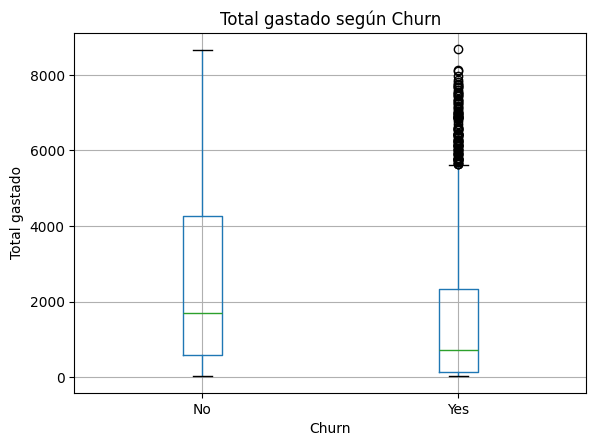

In [82]:
import matplotlib.pyplot as plt

plt.figure()
df.boxplot(column='account.Charges.Total', by='Churn')
plt.title('Total gastado según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Total gastado')

plt.show()


<Figure size 640x480 with 0 Axes>

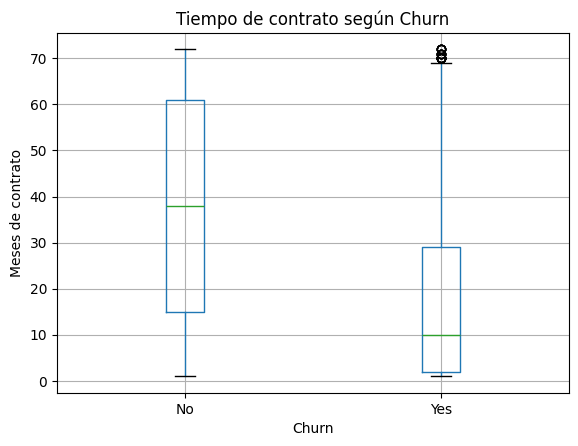

In [79]:
plt.figure()
df.boxplot(column='customer.tenure', by='Churn')
plt.title('Tiempo de contrato según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de contrato')
plt.show()


<Figure size 640x480 with 0 Axes>

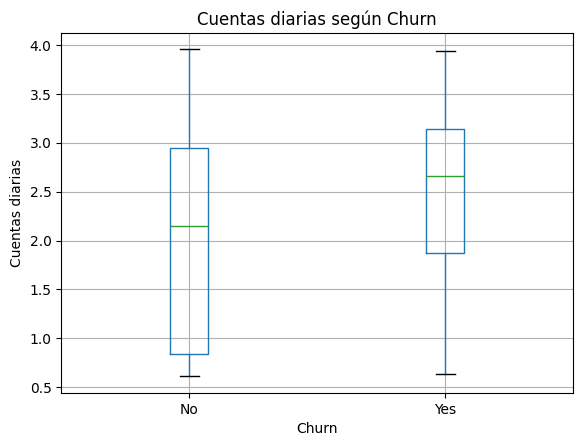

In [80]:
plt.figure()
df.boxplot(column='Cuentas_Diarias', by='Churn')
plt.title('Cuentas diarias según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cuentas diarias')
plt.show()


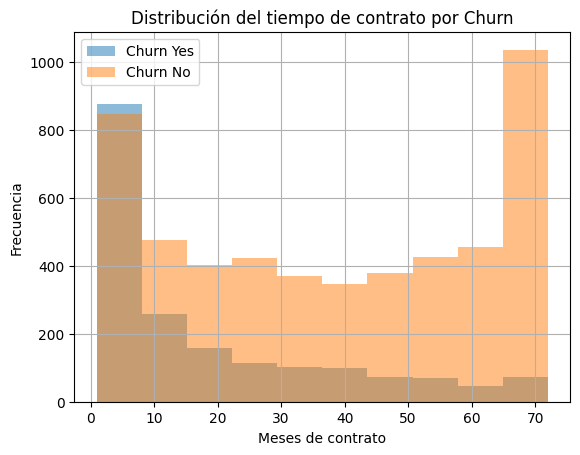

In [81]:
plt.figure()
df[df['Churn'] == 'Yes']['customer.tenure'].hist(alpha=0.5, label='Churn Yes')
df[df['Churn'] == 'No']['customer.tenure'].hist(alpha=0.5, label='Churn No')
plt.legend()
plt.title('Distribución del tiempo de contrato por Churn')
plt.xlabel('Meses de contrato')
plt.ylabel('Frecuencia')
plt.show()


#📄Informe final

📊 Análisis de Evasión de Clientes

🔹 **Introducción**

El objetivo de este análisis es comprender el comportamiento de los clientes y los factores asociados a la evasión, dentro de una empresa de telecomunicaciones. La evasión de clientes representa un problema crítico para el negocio, ya que implica la pérdida de ingresos y mayores costos de adquisición de nuevos clientes.

A través de un análisis exploratorio de datos, se busca identificar patrones y características comunes entre los clientes que cancelan el servicio y aquellos que permanecen activos, con el fin de generar insights que apoyen estrategias de retención.

🔹 **Limpieza y Tratamiento de Datos**

Se inició el análisis importando el dataset y revisando su estructura general. Durante esta etapa se realizaron las siguientes acciones:

Revisión de tipos de datos y nombres de columnas.

Identificación y tratamiento de valores nulos, vacíos y duplicados.

Conversión de columnas numéricas que se encontraban en formato texto.

Normalización de la variable objetivo Churn.

Creación de una nueva variable Cuentas_Diarias, calculada a partir de la facturación mensual, con el objetivo de analizar el gasto diario de los clientes.

Estos pasos permitieron asegurar la calidad de los datos y preparar el dataset para un análisis confiable.

🔹 **Análisis Exploratorio de Datos**

Distribución de la evasión

Se analizó la distribución de la variable Churn, observando que la mayoría de los clientes permanecen activos, mientras que una proporción menor presenta evasión. Esta diferencia evidencia un desbalance entre clases, aspecto importante para análisis posteriores.

Se utilizaron gráficos de barras para visualizar la proporción de clientes que cancelaron frente a los que no lo hicieron.

Análisis por variables categóricas

Se exploró la relación entre la evasión y diversas variables categóricas como:

Género

Tipo de contrato

Método de pago

Servicio de internet

Los resultados muestran diferencias claras en la tasa de evasión según el tipo de contrato y el método de pago, destacando que los contratos mensuales presentan una mayor tasa de evasión en comparación con contratos de mayor duración.

Análisis por variables numéricas

Se compararon variables numéricas clave entre clientes con y sin evasión, tales como:

Total gastado

Tiempo de contrato (tenure)

Cuentas_Diarias

A través de estadísticas descriptivas y boxplots, se observó que los clientes que cancelan el servicio tienden a tener un menor tiempo de permanencia y un menor total gastado, lo que sugiere que la evasión ocurre principalmente en etapas tempranas de la relación con el cliente.

🔹 Conclusiones e Insights

A partir del análisis realizado, se identificaron los siguientes hallazgos clave:

La evasión se concentra principalmente en clientes con contratos de corto plazo.

Los clientes con menor antigüedad presentan mayor probabilidad de cancelar el servicio.

Existen diferencias relevantes en la evasión según el método de pago y el tipo de servicio contratado.

El gasto diario y el total gastado permiten diferenciar comportamientos entre clientes que cancelan y los que permanecen.

Estos insights permiten identificar perfiles de clientes con mayor riesgo de evasión.

🔹 Recomendaciones

Con base en los resultados del análisis, se proponen las siguientes recomendaciones estratégicas:

Implementar estrategias de retención temprana enfocadas en clientes con bajo tiempo de permanencia.

Incentivar contratos de mayor duración mediante beneficios o descuentos.

Analizar y optimizar los métodos de pago asociados a mayores tasas de churn.

Diseñar campañas personalizadas para clientes con perfiles de alto riesgo, utilizando variables como gasto diario y tipo de contrato.

La aplicación de estas estrategias puede contribuir a reducir la evasión y mejorar la retención de clientes.

✅ Conclusión

Este análisis exploratorio permitió comprender los principales factores asociados a la evasión de clientes y sentar las bases para futuras etapas, como la creación de modelos predictivos de churn y el diseño de estrategias de retención basadas en datos.